In [51]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt

In [7]:
# загружаем датасет

In [8]:
df = pd.read_csv("Wholesale customers data.csv")

In [9]:
# посмотрим на данные

In [10]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [12]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [19]:
# откалируем данные
df_scaled = StandardScaler().fit_transform(df)

In [20]:
# приступаем к задаче кластеризации
# построим 3 кластера

In [66]:
km = KMeans(3, n_jobs=-1)
km.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [67]:
labels = km.predict(df_scaled)

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


Wall time: 11.5 s


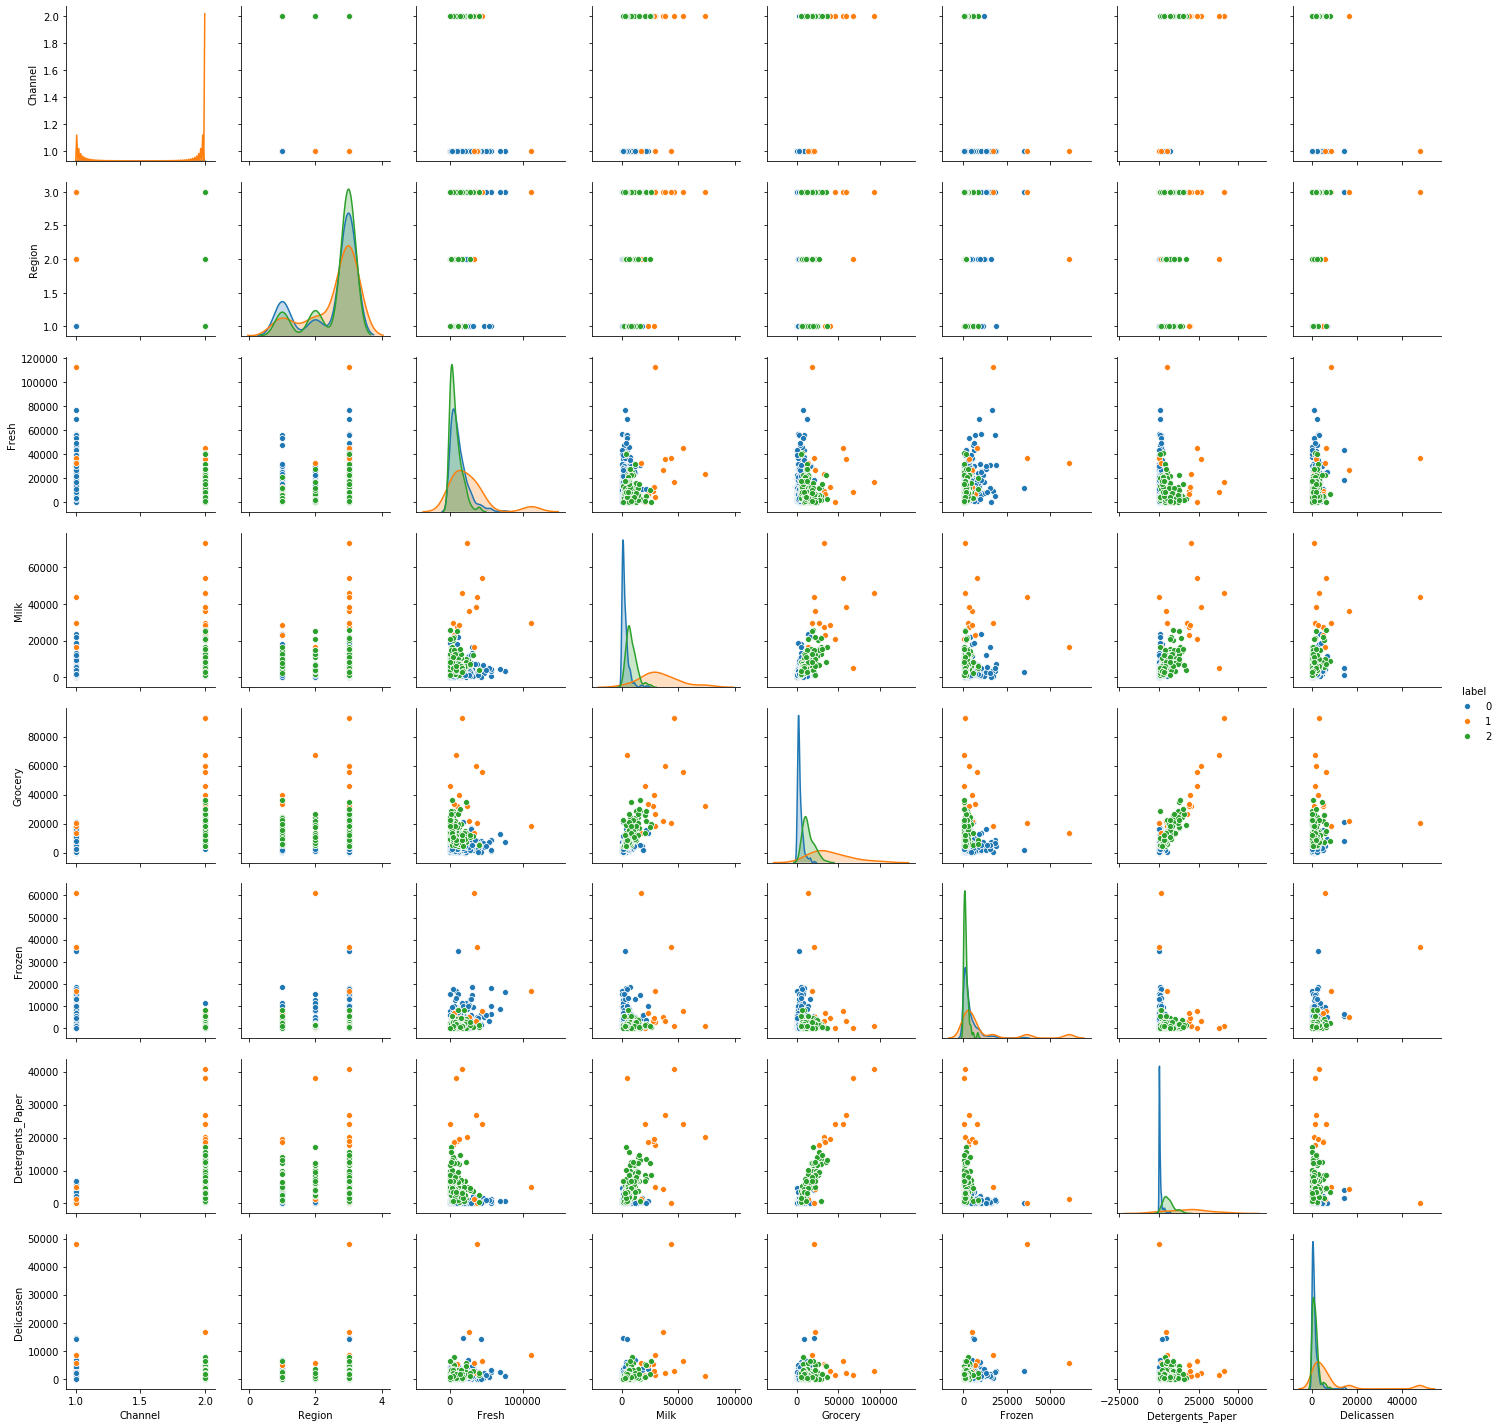

In [68]:
%%time
sns.pairplot(df.join(pd.Series(labels).rename("label")), hue="label", vars=df.columns)

In [45]:
# Выберем оптимальное число кластеров с помощью метода локтя

In [47]:
from sklearn.metrics import silhouette_score

In [61]:
inertia = []
silouette = []
for k in pd.np.arange(2,50):
    km = KMeans(k, n_jobs=-1)
    km.fit(df_scaled)
    inertia.append(km.inertia_)
    labels = km.predict(df_scaled)
    silouette.append(silhouette_score(df_scaled, labels))

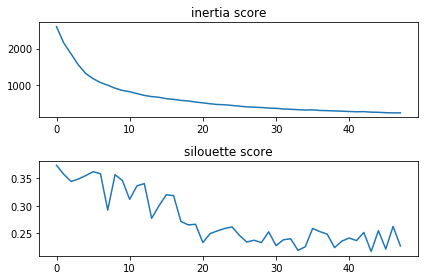

In [62]:
fig, ax = plt.subplots(2)
# fig.set_size(10,10)
ax[0].plot(inertia)
ax[0].set_title("inertia score")
ax[1].plot(silouette)
ax[1].set_title("silouette score")
fig.tight_layout()
plt.show()

In [63]:
# не совсем очевидно, какое в нашем случае будет оптимальное число кластеров. Мне оптимальными видятся 2 варианта - 7 либо 20
# визуализируем 7 кластеров

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Wall time: 18.8 s


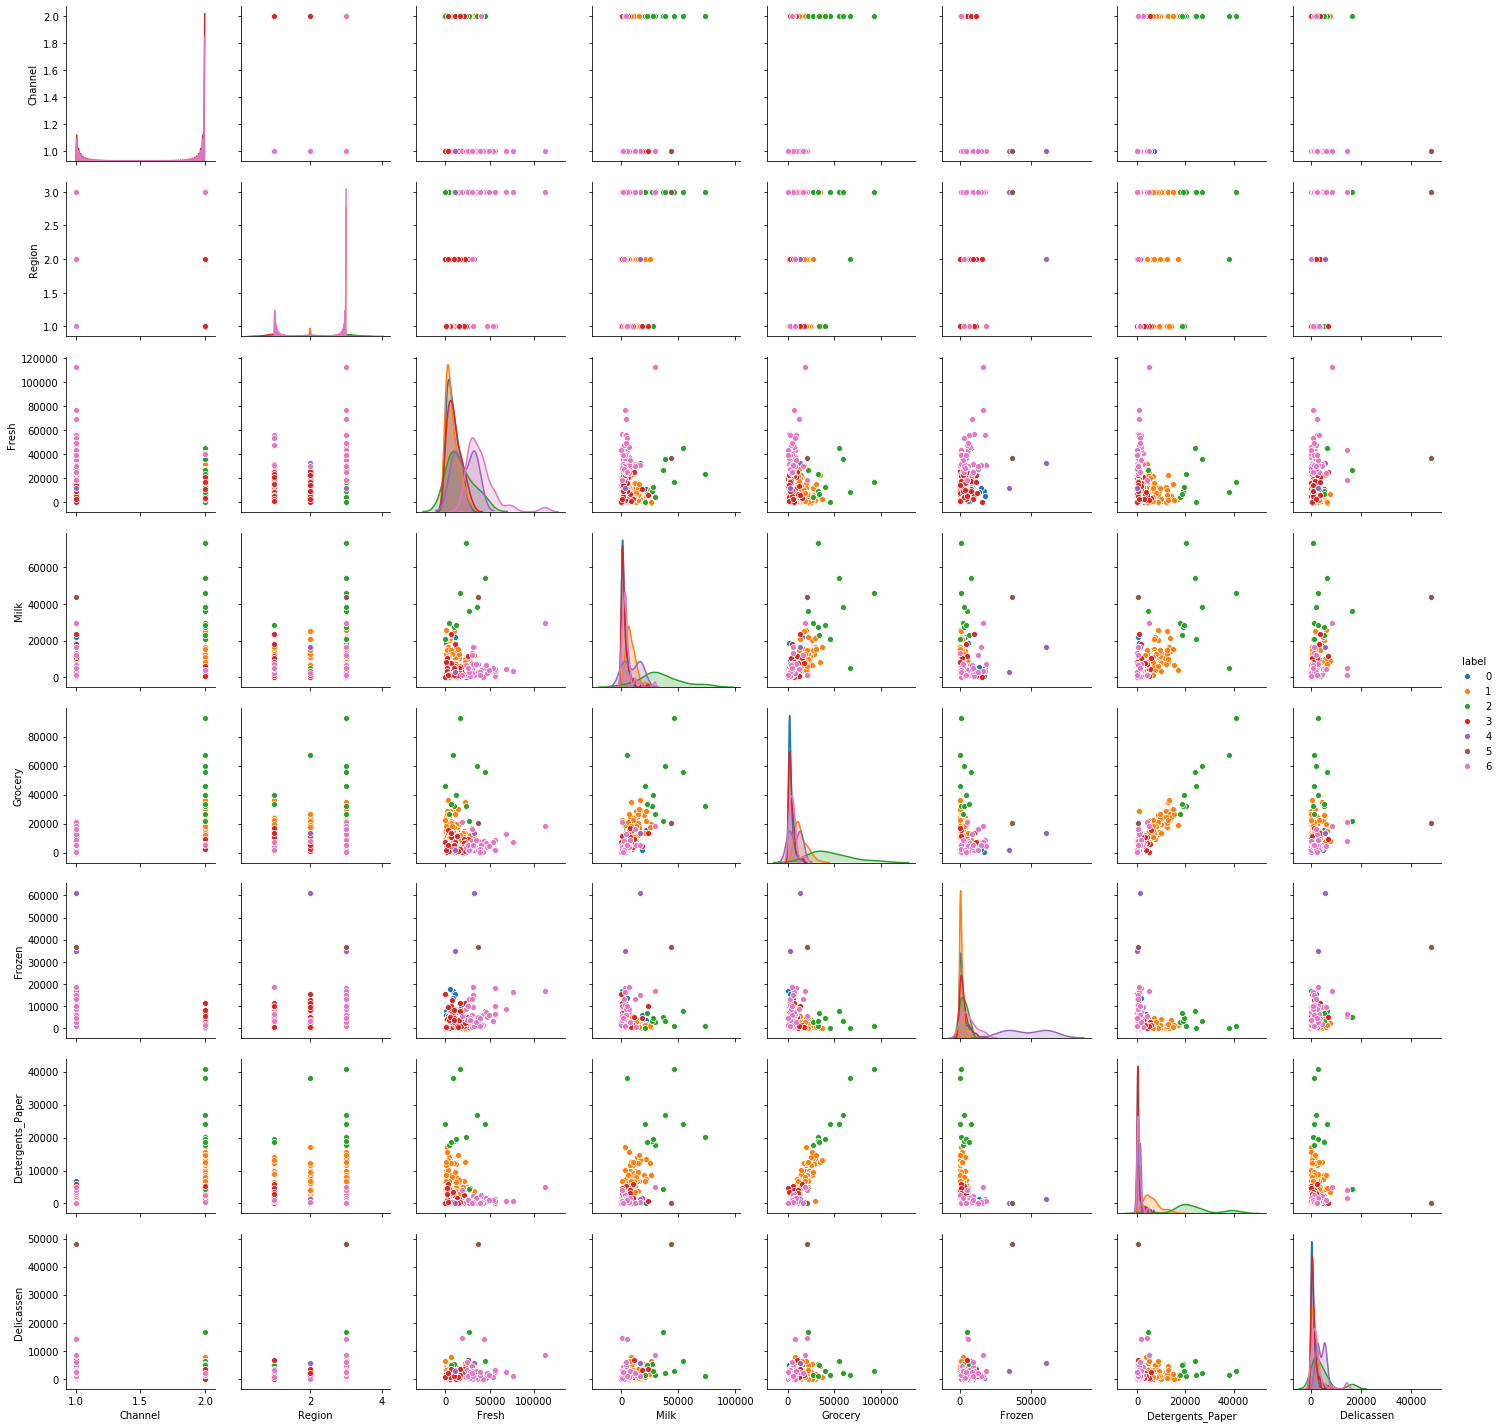

In [69]:
%%time
km = KMeans(7, n_jobs=-1)
km.fit(df_scaled)
labels = km.predict(df_scaled)
sns.pairplot(df.join(pd.Series(labels).rename("label")), hue="label", vars=df.columns)